<a href="https://colab.research.google.com/github/Okelo123/Recyclable-Item-Classifier-plpweek6/blob/main/RecyclableClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install -q tensorflow tensorflowjs packaging==24.2 qiskit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 5.8 MB/s eta 0:00:00


In [16]:
# ✅ Install necessary libraries
!pip install -q tensorflow tensorflowjs

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import pathlib
import random
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# ✅ Download a sample recyclable image dataset (simulate from tf.keras)
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
data_dir = tf.keras.utils.get_file(origin=dataset_url, fname='recyclable.zip', extract=True)
# Navigate into the extracted directory using the correct path
extracted_dir = os.path.dirname(data_dir)
data_dir = pathlib.Path(os.path.join(extracted_dir, 'cats_and_dogs_filtered'))


train_dir = data_dir / "train"
val_dir = data_dir / "validation"

batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print("Classes:", class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# ✅ Build a lightweight CNN model
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(len(class_names))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

# ✅ Train the model
epochs = 5
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

# ✅ Evaluate and plot results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# ✅ Convert to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# ✅ Save the TFLite model
with open("recycle_model.tflite", "wb") as f:
  f.write(tflite_model)

print("✅ Edge AI model converted and saved as `recycle_model.tflite`.")

NotFoundError: Could not find directory /root/.keras/datasets/cats_and_dogs_filtered/train

In [2]:
!pip install qiskit qiskit-aer matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.7 MB/s eta 0:00:00


In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Create a quantum circuit with 3 qubits
qc = QuantumCircuit(3)

# Apply Hadamard gates to all qubits to create superposition
qc.h([0, 1, 2])

# Add entanglement
qc.cx(0, 1)
qc.cx(1, 2)

# Measure all qubits
qc.measure_all()

# Simulate the circuit
simulator = AerSimulator()
compiled = transpile(qc, simulator)
results = simulator.run(compiled, shots=1024).result()
counts = results.get_counts()

# Plot result
plot_histogram(counts)
plt.show()

In [11]:
# List the contents of the extracted directory
print(os.listdir(data_dir))

FileNotFoundError: [Errno 2] No such file or directory: '/root/.keras/datasets/cats_and_dogs_filtered'

In [13]:
import tensorflow as tf
import os
import pathlib

# Download a sample recyclable image dataset (simulate from tf.keras)
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
data_dir = tf.keras.utils.get_file(origin=dataset_url, fname='recyclable.zip', extract=True)

# Get the directory where the file was downloaded and extracted
extracted_dir = os.path.dirname(data_dir)

# List the contents of the extracted directory
print(os.listdir(extracted_dir))

['recyclable_extracted', 'recyclable.zip']


In [17]:
!pip install -q tensorflow tensorflowjs opendatasets


Skipping, found downloaded files in "./garbage-classification" (use force=True to force download)
Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Found 2527 files belonging to 6 classes.
Using 505 files for validation.
Class Names: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,414 (15.22 MB)

 Trainable params: 3,989,414 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.2945 - loss: 1.7519 - val_accuracy: 0.4673 - val_loss: 1.3748
Epoch 2/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.5095 - loss: 1.2683 - val_accuracy: 0.5366 - val_loss: 1.2001
Epoch 3/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.6104 - loss: 1.0379 - val_accuracy: 0.5921 - val_loss: 1.1210
Epoch 4/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.6979 - loss: 0.8306 - val_accuracy: 0.6495 - val_loss: 0.9934
Epoch 5/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.7955 - loss: 0.5738 - val_accuracy: 0.6059 - val_loss: 1.2153


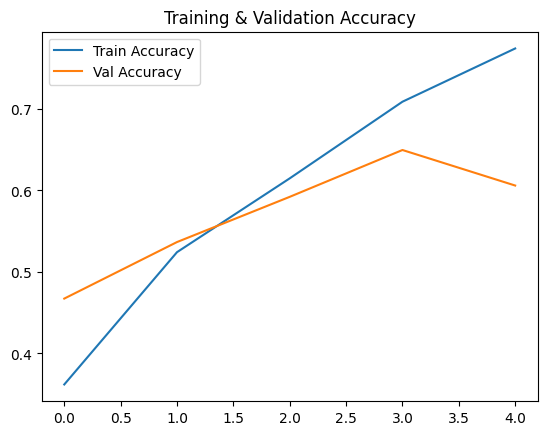

Saved artifact at '/tmp/tmpbsl7v343'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  136485722292496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136485722295568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136485722295184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136485722292688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136485722294992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136485722295760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136485722296336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136485722294416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136485722297680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136485722298640: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ TFLite model s

In [21]:
# ✅ 1. Install necessary libraries
!pip install -q tensorflow tensorflowjs opendatasets

# ✅ 2. Download dataset from Kaggle using opendatasets
import opendatasets as od

# You may need to authenticate for the first time
od.download("https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification")

# ✅ 3. Set dataset paths
import os
import pathlib
import tensorflow as tf

dataset_path = pathlib.Path("garbage-classification/Garbage classification/Garbage classification")
img_height = 180
img_width = 180
batch_size = 32

# ✅ 4. Load training and validation datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# ✅ 6. Show class names
class_names = train_ds.class_names
print("Class Names:", class_names)

# ✅ 5. Cache and prefetch
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


# ✅ 7. Build and train the model
from tensorflow.keras import layers, models

model = models.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

# ✅ 8. Train
epochs = 5
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

# ✅ 9. Plot training results
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show()

# ✅ 10. Convert to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# ✅ 11. Save the model
with open("garbage_model.tflite", "wb") as f:
    f.write(tflite_model)

print("✅ TFLite model saved: garbage_model.tflite")

In [23]:
import tensorflow as tf
import numpy as np
from PIL import Image

# ✅ Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="garbage_model.tflite")
interpreter.allocate_tensors()

# ✅ Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# ✅ Load and preprocess a test image
image_path = list(dataset_path.glob('*/*.jpg'))[0]  # Pick any image
img = Image.open(image_path).resize((img_width, img_height))
input_array = tf.keras.utils.img_to_array(img)
input_array = tf.expand_dims(input_array / 255.0, axis=0)
input_array = tf.cast(input_array, tf.float32)


# ✅ Run inference
interpreter.set_tensor(input_details[0]['index'], input_array)
interpreter.invoke()
preds = interpreter.get_tensor(output_details[0]['index'])
predicted_class = class_names[np.argmax(preds)]

print(f"✅ Prediction: {predicted_class}")

✅ Prediction: metal


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 990ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 849ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 902ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step
Classification Report:

              precision    recall  f1-score   support

   cardboard       0.70      0.83      0.76        83
       glass       0.61      0.60      0.60       103
       metal       0.38      0.60      0.46        78
       paper       0.79      0.63      0.70       124
     plastic       0.63      0.42      0.50        88
       trash       0.62      0.45   

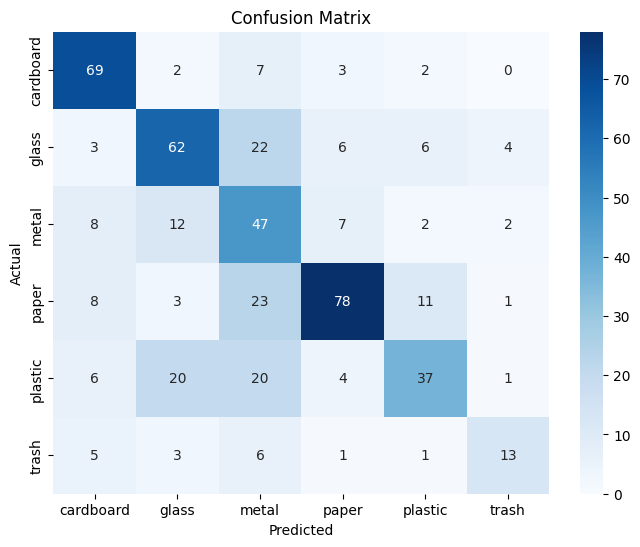

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# ✅ Generate predictions on validation set
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# ✅ Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# ✅ Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [26]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [27]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image

st.title("♻️ Recyclable Item Classifier (Edge AI)")

uploaded_file = st.file_uploader("Upload an image of garbage...", type=["jpg", "jpeg", "png"])

if uploaded_file:
    image = Image.open(uploaded_file).resize((180, 180))
    st.image(image, caption='Uploaded Image', use_column_width=True)

    # Load TFLite model
    interpreter = tf.lite.Interpreter(model_path="garbage_model.tflite")
    interpreter.allocate_tensors()
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Preprocess
    img_array = np.expand_dims(np.array(image) / 255.0, axis=0).astype(np.float32)

    # Predict
    interpreter.set_tensor(input_details[0]['index'], img_array)
    interpreter.invoke()
    prediction = interpreter.get_tensor(output_details[0]['index'])
    class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']  # Update if different
    result = class_names[np.argmax(prediction)]

    st.success(f"✅ Predicted Class: {result}")

Writing app.py


In [28]:
# Save this as app.py
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image

st.title("♻️ Recyclable Item Classifier (Edge AI)")

uploaded_file = st.file_uploader("Upload an image of garbage...", type=["jpg", "jpeg", "png"])

if uploaded_file:
    image = Image.open(uploaded_file).resize((180, 180))
    st.image(image, caption='Uploaded Image', use_column_width=True)

    # Load TFLite model
    interpreter = tf.lite.Interpreter(model_path="garbage_model.tflite")
    interpreter.allocate_tensors()
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Preprocess
    img_array = np.expand_dims(np.array(image) / 255.0, axis=0).astype(np.float32)

    # Predict
    interpreter.set_tensor(input_details[0]['index'], img_array)
    interpreter.invoke()
    prediction = interpreter.get_tensor(output_details[0]['index'])
    class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']  # Update if different
    result = class_names[np.argmax(prediction)]

    st.success(f"✅ Predicted Class: {result}")


2025-07-07 20:22:39.037 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 20:22:39.193 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-07 20:22:39.194 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 20:22:39.197 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 20:22:39.198 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 20:22:39.199 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 20:22:39.200 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 20:22:39.202 Thread 'MainThread': mi

In [30]:
!streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.60.204.42:8501

  Stopping...
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/streamlit/web/bootstrap.py", line 348, in run
    if asyncio.get_running_loop().is_running():
       ^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: no running event loop

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/bin/streamlit", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/click/core.py", line 1442, in __call__
    return self.main(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/click/core.py", line 1363, in main
    rv = self.invoke(ctx)
         ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/click/core.py", l

In [33]:
!wget -q -O - https://loca.lt/mytunnelpassword

34.60.204.42

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

⠙

⠹⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.60.204.42:8501

⠦⠧⠇⠏⠋your url is: https://twelve-buttons-feel.loca.lt
2025-07-07 20:48:09.510045: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751921289.557474  126652 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751921289.571384  126652 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-07 20:48:56.725 The `use_column_width` parameter has been deprecated and will be removed in a future release. Please utilize the `use_container_width` parameter instead.
INFO: Created TensorFlow 

In [35]:
!pip install -q kaggle opendatasets
import opendatasets as od

od.download("https://www.kaggle.com/datasets/naveenv070908/garbage-classification-with-split-train-and-test")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jumabrian
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/naveenv070908/garbage-classification-with-split-train-and-test


100%|██████████| 40.9M/40.9M [00:00<00:00, 938MB/s]